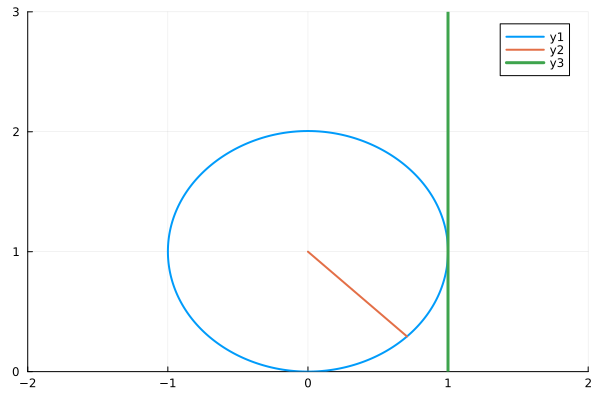

In [42]:

include("problemConditionStruct.jl"); include("./zeta.jl");
include("./maximum_contact_radius.jl");
using LegendrePolynomials: collectPl
using Plots;
"""
    plot_current_conditions(Union{ProblemConditions, Vector{Float64}})

Plots the current conditions of the problem
"""
function plot_current_conditions(data::Union{ProblemConditions, Vector{Float64}}; center_of_mass::Float64 = NaN, theta::Float64 = NaN);

    if typeof(data) <: ProblemConditions; 
        if isnan(center_of_mass)
            center_of_mass = data.center_of_mass
        end
        data = data.deformation_amplitudes; 
    end
    if isnan(center_of_mass); center_of_mass = 1+sum([(-1)^ii * data[ii] for ii in eachindex(data)]); end
    d = length(data);
    ζ = zeta(data; order = d);
    # ζ(θ::Float64) = sum(data .* (collectPl(cos(θ), lmax = d).parent)[2:end]);
    x(θ::Float64) = sin(θ) * (1 + ζ(θ));
    y(θ::Float64) = center_of_mass + cos(θ) * (1 + ζ(θ));

    rrange = LinRange(0, 2π, 500);

    plot(
        x.(rrange), y.(rrange), 
        lims = (-2, 2),
        lw = 2
    )
    if !isnan(theta)
        plot!([0.0, x(theta)], [center_of_mass, y(theta)], lw = 2);
    end
    r = maximum_contact_radius(data)
    plot!([r, r], [-10, 10], lw = 3);
    default(show = true)
    xlims!(-2, 2)
    ylims!(0, 3)
end

plot_current_conditions(0.01.*[.1, .1, .1, .1, .1, .1]; theta = 3*pi/4)



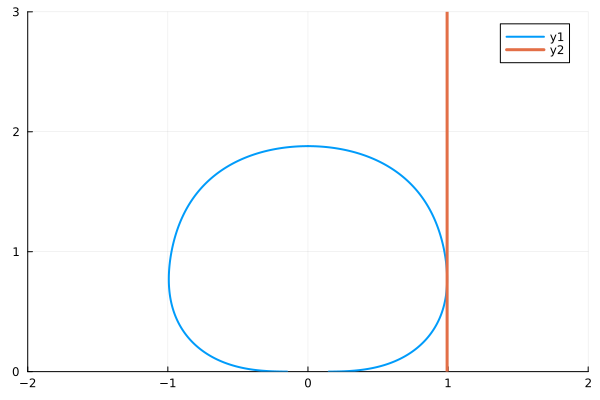

In [47]:
plot_current_conditions(0.15 .* [.2, -.1, .4, -.3];)

angle = pi/1.9;

